In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [54]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.4]])

mean_02 = np.array([3,4.5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])

In [55]:
dist_01 = np.random.multivariate_normal(mean_01,cov_01,400)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,400)

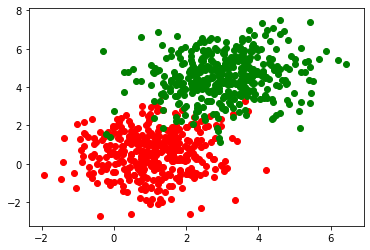

In [56]:
plt.scatter(dist_01[:,0],dist_01[:,1],color='red')
plt.scatter(dist_02[:,0],dist_02[:,1],color='green')
plt.show()

In [57]:
total = dist_01.shape[0] + dist_02.shape[0]
print(total)

800


In [58]:
data = np.zeros((total,3))
print(data.shape)

(800, 3)


In [59]:
data[:400,:-1] = dist_01
data[400:,:-1] = dist_02
data[400:,-1] = 1

In [60]:
print(data)

[[0.0541972  0.40395268 0.        ]
 [2.06675828 0.79374126 0.        ]
 [0.20854866 0.2090993  0.        ]
 ...
 [4.44457208 4.9690274  1.        ]
 [3.7071207  4.54928156 1.        ]
 [3.33081013 3.37824353 1.        ]]


In [61]:
np.random.shuffle(data)
print(data)

[[ 3.64313523  3.24604406  0.        ]
 [ 4.11517704  7.32152008  1.        ]
 [-0.70069992 -0.5251879   0.        ]
 ...
 [ 1.05574617  1.0522944   0.        ]
 [ 3.85619515  6.22057186  1.        ]
 [ 3.36993155  4.15208621  1.        ]]


In [62]:
## Normalize the data
u = np.mean(data[:,:-1],axis=0)
sigma = np.std(data[:,:-1],axis=0)

data[:,:-1] = (data[:,:-1]-u)/sigma
print(data.shape)

(800, 3)


In [63]:
ones = np.ones((data.shape[0],1),dtype='float32')

In [64]:
final_data = np.hstack((ones,data))
print(final_data)

[[ 1.          1.09877681  0.30425107  0.        ]
 [ 1.          1.42614694  2.09141305  1.        ]
 [ 1.         -1.91375694 -1.34949499  0.        ]
 ...
 [ 1.         -0.69562758 -0.65774355  0.        ]
 [ 1.          1.24653799  1.6086295   1.        ]
 [ 1.          0.90930477  0.70156517  1.        ]]


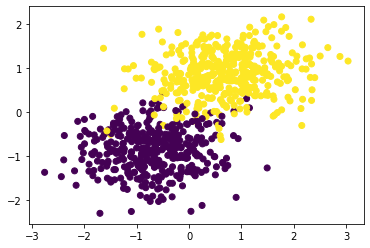

In [65]:
plt.scatter(final_data[:,1],final_data[:,2],c=final_data[:,3])
plt.show()

In [66]:
split = int(0.8*total)
print(split)

640


In [67]:
X_train = final_data[:split,:-1]
X_test = final_data[split:,:-1]

Y_train = final_data[:split,-1]
Y_test  = final_data[split:,-1]

In [68]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(640, 3) (160, 3)
(640,) (160,)


In [69]:
#np.unique(Y_test,return_counts=True)

In [70]:
np.mean(X_train,axis=0)


array([ 1.       , -0.0168195, -0.0149254])

In [71]:
print(Y_test)

[0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1.]


## Logistic Regression

In [72]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [73]:
def hypothesis(x,theta):
    return sigmoid(np.dot(x,theta))

In [74]:
def error(Y,X,theta):
    m = X.shape[0]
    total_error = 0.0
    
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        total_error += (Y[i]*np.log2(y_hat)+(1-Y[i])*np.log2(1-y_hat)) 
        
    return total_error/m #Average Loss

In [75]:
def get_grad(Y,X,theta):
    
    grad = np.zeros(theta.shape)
    m = X.shape[0]
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        x = X[i].reshape((-1,1))
        grad += (Y[i] - y_hat)*x
        
        
    return grad/m #Average Gradient

In [76]:
def grad_descent(X,Y,learning_rate=0.5):
    theta = np.zeros((X.shape[1],1))
    
    error_list = []
    
    for i in range(500):
        theta = theta + learning_rate*get_grad(Y,X,theta)
        e = error(Y,X,theta)
        error_list.append(e)
        
    return theta,error_list

In [77]:
theta,error_list = grad_descent(X_train,Y_train)

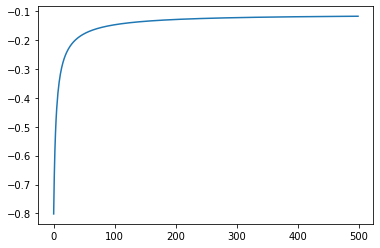

In [78]:
plt.plot(error_list)
plt.show()

In [79]:
def predict(xtest,theta):
    prob = hypothesis(xtest,theta)
    if prob<=0.5:
        return 0
    else:
        return 1
    

In [80]:
Y_Pred = np.array([predict(X_test[i],theta) for i in range(X_test.shape[0])])

In [81]:
Y_test = np.array(Y_test,dtype='int32')

In [82]:
print("Test Accuracy")
np.sum((Y_Pred==Y_test))*100/Y_test.shape[0]

Test Accuracy


95.0

In [83]:
print(theta)

[[-0.06149031]
 [ 1.59737428]
 [ 5.05974731]]


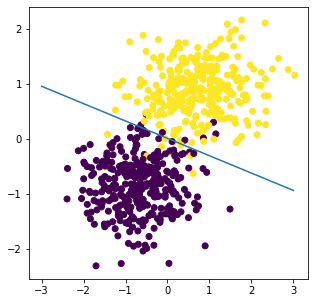

In [84]:
def drawLine():
    plt.figure(figsize=(5,5))
    x = np.linspace(-3,3,10)
    y = -(theta[0,0]*1 + theta[1,0]*x)/theta[2,0]
    plt.scatter(X_train[:,1],X_train[:,2],c=Y_train)
    
    plt.plot(x,y)
    
drawLine()